## Pytorch Conmputer Vision
Conputer vision libraries in Pytorch

* torchvision - base domain library for pytorch

* torchvision.datasets - get datasets and data loading functions for computer vision here

* torchvision.models - get pretrained computer vision models that you can leverage  for your own problems

* torchvision.transforms - functions for manipulationg your vision data (images) to be suitable for use with an ML model

* torch.utils.data.Dataset - Base dataset class for Pytorch

* torch.utils.data.DataLoader - Creates a python iterable over a dataset

In [1]:
#import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib for visualization
import matplotlib.pyplot as plt



The Dataset that we 'll be using is FashionMNIST form Pytorch
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [2]:
#get the dataset
train_data=datasets.FashionMNIST(root="data", #where to download the dataset to
                                train=True, #do we want to install the training dataset
                                 download=True, #do we want to download it
                                 transform=torchvision.transforms.ToTensor(), #transform the data to tensors
                                 target_transform=None #how do we want to transform the labels
                                 )


test_data=datasets.FashionMNIST(root="data", #where to download the dataset to
                                train=False, #do we want to install the training dataset
                                 download=True, #do we want to download it
                                 transform=torchvision.transforms.ToTensor(), #transform the data to tensors
                                 target_transform=None #how do we want to transform the labels
                                 )

100%|██████████| 26421880/26421880 [00:02<00:00, 10439871.49it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 183701.37it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3715831.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19611514.07it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
#see the first training sample
image, label =train_data[0]

image.shape,label

(torch.Size([1, 28, 28]), 9)

In [5]:
#get the names of the classes
class_names=train_data.classes

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
#get a dictionary of what each label represents
class_to_idx=train_data.class_to_idx

class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
#check the shapes

print(f"image shape in the following format [color channels,height, width] : {image.shape} , Image label : {class_names[label]}")

image shape in the following format [color channels,height, width] : torch.Size([1, 28, 28]) , Image label : Ankle boot


Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

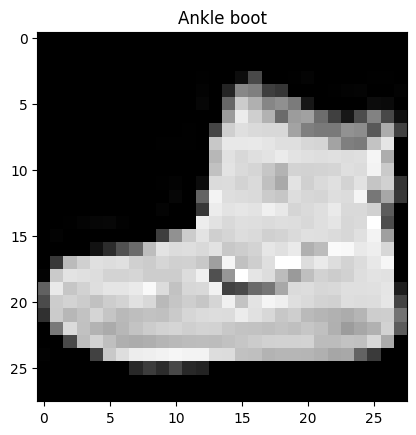

In [8]:
#Visualize the data

print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

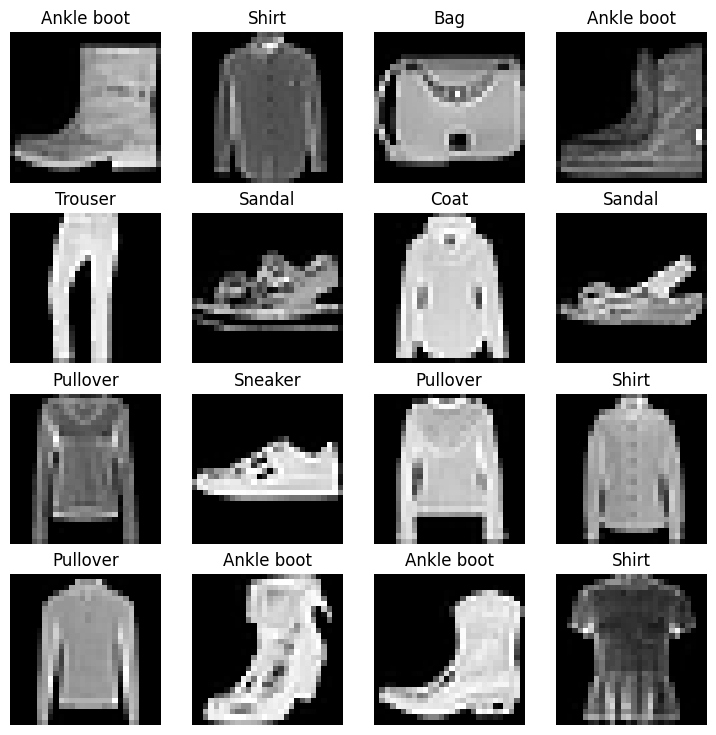

In [9]:
#plot more images

torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols=4,4
for i in range(1, rows*cols + 1):
  #print(i)
  random_idx=torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx)
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



## Prepare DataLoader

Right now our data is in the form of a Pytorch Dataset.

DataLoader turns our data into Python iterable

More specifically, we want to turn our data into batches or mini-batches

We do this because

* It is more computetionally effective, as our computer may not be able to store in memory all the images in our data in one hit so we break it down to 32 images at a time.

* It gives our Neural Network more chances to upgrade its gradient per epoch

In [10]:
#import the DataLoader library
from torch.utils.data import DataLoader

#set up batch size
BATCH_SIZE=32

#turn data into python iterables
train_Dataloader= DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                             shuffle=True)

test_Dataloader= DataLoader(dataset=test_data,
                          batch_size=BATCH_SIZE,
                             shuffle=True)

In [11]:
#print results
print(f"train dataloader:{train_Dataloader}, test dataloader:{test_Dataloader}")
print(f"train dataloader length:{len(train_Dataloader)}, test dataloader length :{len(test_Dataloader)}, Batch size :{BATCH_SIZE}")

train dataloader:<torch.utils.data.dataloader.DataLoader object at 0x79b58f6a3f10>, test dataloader:<torch.utils.data.dataloader.DataLoader object at 0x79b58fa0c070>
train dataloader length:1875, test dataloader length :313, Batch size :32


In [12]:
#check whats inside
train_features_batch, train_labels_batch= next(iter(train_Dataloader))
test_features_batch, test_labels_batch= next(iter(test_Dataloader))

train_features_batch.shape , train_labels_batch.shape, len(train_features_batch)

(torch.Size([32, 1, 28, 28]), torch.Size([32]), 32)

(-0.5, 27.5, 27.5, -0.5)

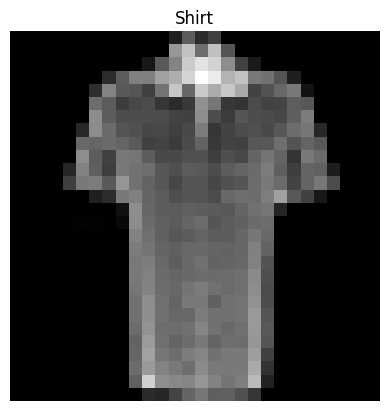

In [13]:
#show a random sample
torch.manual_seed(42)
random_idx=  random_idx=torch.randint(0, len(train_features_batch), size=[1]).item()
image, label= train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## Model 0 : Build a Baseline Model
When starting to build a series of machine learning modleing experiments, its best practice to start with a baseline model.
A baseline model is a model we will try and improve on with subsequent modles/experiments.
In other words we start simply and add complexity when necessary.

In [14]:
#create a flatten layer
flatten_model=nn.Flatten()

#get a single feature
x=train_features_batch[0]
x.shape

#flatten the sample
output=flatten_model(x)

print(f"sample shape before flatening {x.shape}")
print(f"sample shape before flatening {output.shape}")


sample shape before flatening torch.Size([1, 28, 28])
sample shape before flatening torch.Size([1, 784])


In [15]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               output_shape:int,
               hidden_units:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(
            in_features=hidden_units,
            out_features=output_shape
        )
    )

  def forward(self, x):
    return self.layer_stack(x)


model_0=FashionMNISTModelV0(input_shape=28*28,
                            output_shape=len(class_names),
                            hidden_units=10)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
dummy_x=torch.rand([1,1,28,28])
with torch.inference_mode():
  print(model_0(dummy_x))

model_0.state_dict()

tensor([[ 0.4283,  0.1136, -0.3903, -0.0246, -0.0698,  0.2508,  0.4007, -0.4172,
         -0.0264, -0.2463]])


OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

## Set up loss, Optimizer and evaluation metrics

* since we are working with multi-class data out loss function will be nn.CrossEntropyLoss()

* for the optimizer we are going to keep using SGD()

* since we re working on a classification prolem we will use accuracy as our evaluation metric

In [17]:
import requests
from pathlib import Path

#download helper functions from pytorch repo
if Path("helper_functions.py").is_file():
    print("file already exists")
    print(Path("helper_functions.py"))

else:
    print("Downloading helper_functions.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb")as f:
        f.write(request.content)

from helper_functions import *

In [18]:
#import accuracy metric
from helper_functions import accuracy_fn


#set loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

## Creating a function to test how fast our model is
In machine learning the main characteristics of our model we want to keep track of are:
* Its performance (loss, accuracy etc)
* How fast it runs

In [19]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     #we do this to compare how fast our model runs on different devices
                     device : torch.device = None ):
  #prints difference between start and end time
  total_time=end-start
  print(f"total time : {total_time:.3f} seconds on device : {device}")
  return total_time


## Creating a training loop and training a model on batches of data

* Loop through epochs
* In training, we loop trhough the training batches, perform the training steps and calculate the loss `per batch`
* In testing we loop trhough the testing batches, perform the testing steps and calculate the loss `per batch`
* Print what is happening
* Time the whole process

In [20]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start timer
torch.manual_seed(42)

start_train_time_on_cpu=timer()

#set the number of epochs (we keep it small for faster training time)
epochs=3

#create a train/test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}")
  train_loss=0
  for batch, (X,y) in enumerate(train_Dataloader):
    #set the mode to training
    model_0.train()

    #perform the forward pass
    y_pred=model_0(X)

    #calculate the loss
    loss=loss_fn(y_pred, y)
    train_loss+=loss

    #optimizer zero grad
    optimizer.zero_grad()

    #perform backpropagation
    loss.backward()

    #step the optimizer
    optimizer.step()

    #print what is happening
    if batch % 400 ==0 :
          print(f"looked at {batch * len(X)/len(train_Dataloader.dataset)} samples")

  #divide total train loss by length of train_dataloader
  train_loss /= len(train_Dataloader)

  #testing
  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for (X_test, y_test) in test_Dataloader:
      #forward pass
      y_test_pred=model_0(X_test)

      #calculate loss and accuracy (accumulatively)
      test_loss += loss_fn(y_test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=y_test_pred.argmax(dim=1))

    #calculate test loss and accuracy average per batch
    test_loss/=len(test_Dataloader)

    test_acc/=len(test_Dataloader)

  #print out whats happening
  print(f"Train Loss : {train_loss} Test Loss : {test_loss} Test Accuracy : {test_acc}")

end_train_time_on_cpu=timer()
model_0_total_train_time=print_train_time(start=start_train_time_on_cpu, end=end_train_time_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
looked at 0.0 samples
looked at 0.21333333333333335 samples
looked at 0.4266666666666667 samples
looked at 0.64 samples
looked at 0.8533333333333334 samples
Train Loss : 0.5948367118835449 Test Loss : 0.517036497592926 Test Accuracy : 81.82907348242811
Epoch : 1
looked at 0.0 samples
looked at 0.21333333333333335 samples
looked at 0.4266666666666667 samples
looked at 0.64 samples
looked at 0.8533333333333334 samples
Train Loss : 0.4774148464202881 Test Loss : 0.5343255400657654 Test Accuracy : 81.39976038338658
Epoch : 2
looked at 0.0 samples
looked at 0.21333333333333335 samples
looked at 0.4266666666666667 samples
looked at 0.64 samples
looked at 0.8533333333333334 samples
Train Loss : 0.4555201828479767 Test Loss : 0.5168395042419434 Test Accuracy : 82.8873801916933
total time : 25.408 seconds on device : cpu


In [21]:
#make some predictions with the now trained model
#we functionize it this time for reusability
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device):
  #we return a dictionary containing the results of our model predicting on dataloader
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in tqdm(dataloader):
      #pass data to target device
      X_test, y_test= X_test.to(device), y_test.to(device)

      #make predictions
      y_pred=model(X_test)

      loss+=loss_fn(y_pred, y_test)

      acc+=accuracy_fn(y_true=y_test, y_pred=y_pred.argmax(dim=1))

    #scale loss and acc to find averages per batch
    loss/=len(dataloader)

    acc/=len(dataloader)

    #return the dictionary containing our results
    return {"model_name": model.__class__.__name__ #only works when model is created with a class
            ,"model_loss":loss.item(),
            "model_accuracy":acc}


model_0_results=eval_model(model=model_0, dataloader=test_Dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device='cpu')

model_0_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.516737699508667,
 'model_accuracy': 82.8973642172524}

In [22]:
#setup device agnostic code
import torch
device='cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [23]:
#Next step is we try to build a better model that includes non-linearity

from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               output_shape:int,
               hidden_units:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten() #flaten inputs into a single vector
        ,nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        #add non-linear layers
        nn.ReLU(),
        nn.Linear(
            in_features=hidden_units,
            out_features=output_shape
        ),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

#create an instance of the model

model_1=FashionMNISTModelV1(input_shape=28*28,hidden_units=10, output_shape=len(class_names)).to(device)
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0174,  0.0210,  0.0315,  ...,  0.0085, -0.0182,  0.0344],
                      [-0.0162,  0.0241,  0.0181,  ...,  0.0133, -0.0108, -0.0213],
                      [ 0.0084, -0.0042, -0.0162,  ...,  0.0026,  0.0231,  0.0155],
                      ...,
                      [ 0.0087, -0.0141,  0.0105,  ...,  0.0243, -0.0006,  0.0088],
                      [ 0.0018, -0.0136, -0.0354,  ..., -0.0194, -0.0170,  0.0233],
                      [-0.0098, -0.0313,  0.0015,  ...,  0.0255,  0.0017,  0.0037]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0302, -0.0123,  0.0018,  0.0163,  0.0069, -0.0078,  0.0002,  0.0307,
                       0.0238,  0.0122], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[-0.2279, -0.1063,  0.2019,  0.2847, -0.1495,  0.1344, -0.0740,  0.2006,
                       -0.0475, -0.2514],
                      [-0

In [24]:
#set up loss function and optimizer
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [25]:
#we make the test/train loops into functions for reusability

def train_step(model:torch.nn.Module
               ,dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss, train_acc=0,0

  #set the mode to training
  model.train()

  for batch, (X_train,y_train) in enumerate(dataloader):

    #put data on the target device
    X_train, y_train = X_train.to(device), y_train.to(device)

    #perform the forward pass
    y_pred=model(X_train)

    #calculate the loss
    loss=loss_fn(y_pred, y_train)
    train_loss+=loss

    train_acc+=accuracy_fn(y_true=y_train, y_pred=y_pred.argmax(dim=1))
    #optimizer zero grad
    optimizer.zero_grad()

    #perform backpropagation
    loss.backward()

    #step the optimizer
    optimizer.step()

  #divide total train loss by length of train_dataloader
  train_loss /= len(dataloader)
  train_acc/=len(dataloader)
  #print what is happening
  print(f"Train loss {train_loss:.5f} Train accuracy : {train_acc:.2f}")


In [26]:
#do the same with the test loop
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  test_loss, test_acc=0,0

  #set the mode to testing
  model.eval()
  with torch.inference_mode():
   for X_test,y_test in dataloader:

      #send data to target device
      X_test, y_test=X_test.to(device), y_test.to(device)

      #perform forward pass
      y_test_pred=model(X_test)

      #calculate test loss and test accuracy
      test_loss+=loss_fn(y_test_pred, y_test)

      test_acc+=accuracy_fn(y_true=y_test, y_pred=y_test_pred.argmax(dim=1))

   #find average loss and accuracy per batch
   test_loss/=len(dataloader)
   test_acc/=len(dataloader)
   #print out whats happening
   print(f"Test Loss : {test_loss:5f} Test Accuracy : {test_acc:.2f}")






In [27]:
#test if the functions work properly
#import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start timer
torch.manual_seed(42)
epochs=3

start_train_time_on_gpu=timer()
for epoch in tqdm(range(epochs)):

  print(f"epoch :{epoch}")

  train_step(model=model_1,
             dataloader=train_Dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             dataloader=test_Dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

end_train_time_on_gpu=timer()
model_1_total_train_time=print_train_time(start=start_train_time_on_gpu, end=end_train_time_on_gpu, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch :0
Train loss 1.25941 Train accuracy : 59.00
Test Loss : 0.897356 Test Accuracy : 69.39
epoch :1
Train loss 0.81512 Train accuracy : 71.87
Test Loss : 0.782196 Test Accuracy : 72.61
epoch :2
Train loss 0.73779 Train accuracy : 74.34
Test Loss : 0.734348 Test Accuracy : 74.25
total time : 31.965 seconds on device : cuda


In [28]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.516737699508667,
 'model_accuracy': 82.8973642172524}

In [29]:
#get model_1 results on a dictionary
model_1_results=eval_model(model=model_1,
                           dataloader=test_Dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device
                           )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7340835332870483,
 'model_accuracy': 74.27116613418531}

## Building a CNN (Convolusional Neural Network)
CNN's are also known as ConvNets. They are known for their capabilities to find patterns in the data.

See more on CNNeplainer website : https://poloclub.github.io/cnn-explainer/

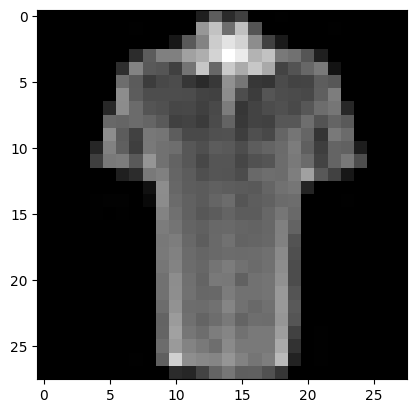

In [30]:
plt.imshow(image.squeeze(0), cmap='gray')

In [31]:
from torch.nn.modules import MaxPool2d
#lets create a convolusional neural network model

class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, output_shape:int, hidden_units:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ), #values in a NN that we can set ourselves are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #the trick here is to multiply hidden_units with the other 2 dimensions that are getting compressed after they have been compressed in the last block before the classifier
                  out_features=output_shape)
    )

  def forward(self, x):
    #print(x.shape)
    x=self.conv_block_1(x)
    #print(f"output shape of conv_block_1 : {x.shape}")
    x=self.conv_block_2(x)
    #print(f"output shape of conv_block_2: {x.shape}")
    x=self.classifier(x)
    #print(f"output shape of classifier : {x.shape}")
    return x


#create instance of the model
#since we are working with black and white images input shape is
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1, output_shape=len(class_names), hidden_units=10).to(device)

model_2



model_2(image.unsqueeze(0).to(device))



tensor([[ 0.0336, -0.0608,  0.0488, -0.0278, -0.0114,  0.0173, -0.0064, -0.0112,
          0.0315,  0.0112]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [32]:
#next we try to train our model_2
#we start by setting a loss function and optimizer

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.01)


In [33]:
#now we make a train/test loop

#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the total number of epochs
epochs=3

train_time_model_2=timer()

for epoch in range(epochs):
  print(f"epoch : {epoch}")
  train_step(model=model_2,dataloader=train_Dataloader,loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)

  test_step(model=model_2,dataloader=test_Dataloader,loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

end_train_time_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_model_2, end=end_train_time_model_2, device=device)

epoch : 0
Train loss 1.03784 Train accuracy : 62.34
Test Loss : 0.625516 Test Accuracy : 76.88
epoch : 1
Train loss 0.54810 Train accuracy : 80.11
Test Loss : 0.524219 Test Accuracy : 80.28
epoch : 2
Train loss 0.45580 Train accuracy : 83.62
Test Loss : 0.455140 Test Accuracy : 84.15
total time : 33.876 seconds on device : cuda


In [34]:
#make predictions
model_2_results=eval_model(model=model_2, dataloader=test_Dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4544661045074463,
 'model_accuracy': 84.17531948881789}

In [35]:
#now lets compare the results between all the models we created
import pandas as pd

compare_results=pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.516738,82.897364
1,FashionMNISTModelV1,0.734084,74.271166
2,FashionMNISTModelV2,0.454466,84.175319


In [36]:
#add train time metric to dataframe

compare_results["training time"]=([model_0_total_train_time, model_1_total_train_time, total_train_time_model_2 ])

compare_results

,model_name,model_loss,model_accuracy,training time
0,FashionMNISTModelV0,0.516738,82.897364,25.408458
1,FashionMNISTModelV1,0.734084,74.271166,31.964854
2,FashionMNISTModelV2,0.454466,84.175319,33.876248


Text(0, 0.5, 'model')

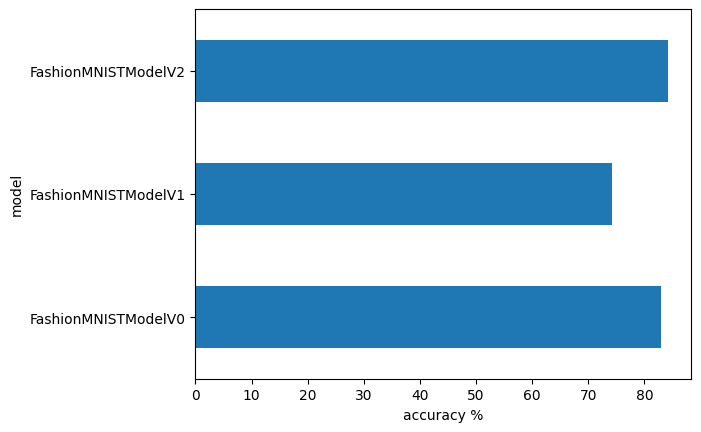

In [37]:
#plot the results
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model")

In [38]:
#make some predictions with our best model


def make_predictions(model:nn.Module, data:list, device:torch.device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare a sample (add a batch dimension and pass to target device)
      sample=torch.unsqueeze(sample, dim=0).to(device)

      pred_logit=model(sample)

      pred_prob=torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  #stack pred_probs to turn list to a tensor
  return torch.stack(pred_probs)

In [39]:
import random
random.seed(42)

test_samples=[]
test_labels=[]

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


In [40]:
#make predictions on random samples
pred_probs=make_predictions(model=model_2, data=test_samples, device=device)

pred_probs[:2]

#convert probabilities to classes
pred_classes=pred_probs.argmax(dim=1)
print(f"predicted classes are :{pred_classes}")
print(f"actual classes are : {test_labels}")

predicted classes are :tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])
actual classes are : [5, 1, 7, 4, 3, 0, 4, 7, 1]


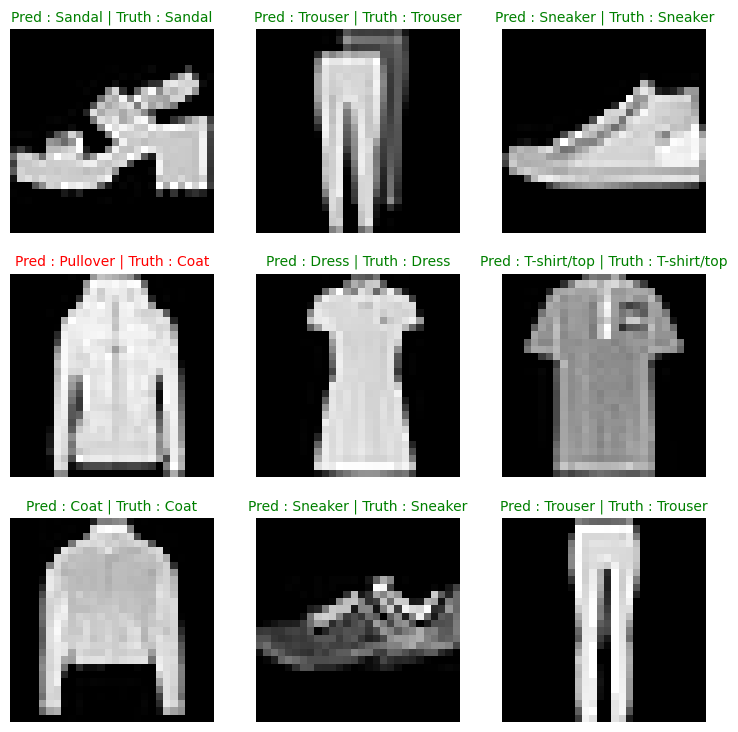

In [41]:
#plot the predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows, ncols, i+1)

  #plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  #find the prediction label
  pred_label = class_names[pred_classes[i]]

  #find actual label
  true_label= class_names[test_labels[i]]

  #create a title for the plot
  title_text=f"Pred : {pred_label} | Truth : {true_label}"

  plt.axis(False)

  #check for equality between pred and truth and change color of title text
  if pred_label==true_label:
    plt.title(title_text, fontsize=10, c="g") #green color if prediction is correct
  else:
    plt.title(title_text, fontsize=10, c="r") #red color if prediction in false




## Make a confusion matrix for further prediction evaluation

we have to :

* make predictions
* make a confusion matrix `torchmetrics.ConfusionMatrix`
* plot the confusion matrix using `mlextend.plotting.plot_confusion_matrix`

In [42]:
from tqdm.auto import tqdm

#1 make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(test_Dataloader, desc="Making predictions..."):
    #send data to target device
    X_test, y_test= X_test.to(device), y_test.to(device)

    y_pred_logits=model_2(X_test)

    #convert logits->probavilities->labels
    y_pred=torch.softmax(y_pred_logits.squeeze(), dim=0).argmax(dim=1) #softmax can be skipped

    #put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())

#concatenate list of predictions to a tensor

y_preds_tensor=torch.cat(y_preds)
y_preds_tensor[:10]



Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([6, 9, 6, 0, 7, 1, 0, 7, 6, 9])

In [43]:
#see if packages needed to install confusion matrix are needed, if not install them
try:
  import torchmetrics, mlxtend
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version must be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version :{mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
mlxtend version :0.23.0


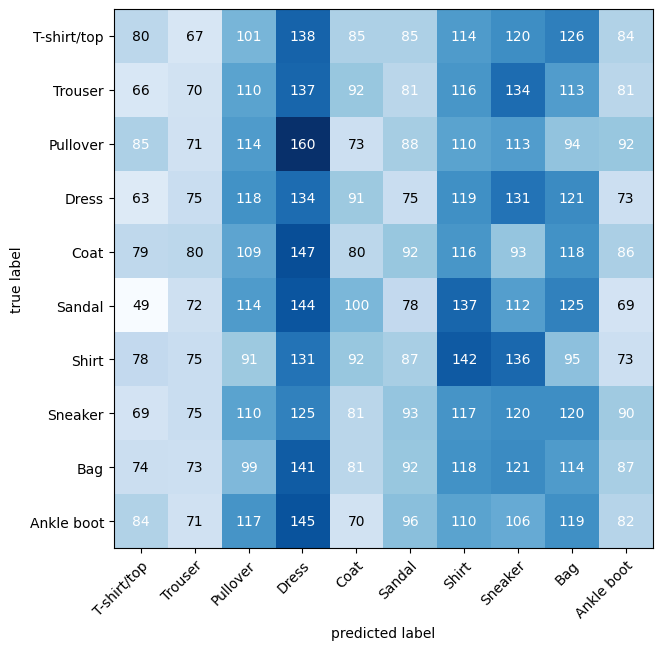

In [44]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#setup confusion instance and compare predictions to targets
confmat=ConfusionMatrix(num_classes=len(class_names), task="multiclass")

confmat_tensor=confmat(preds=y_preds_tensor, target=test_data.targets )

#plot the confusion matrix
fig , ax= plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy() #his works with matplotlib which works with numpy so all tensors should first be converted to numpy
    ,class_names=class_names,
    figsize=(10,7)
)



In [45]:
#save and load the model
from pathlib import Path

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch_fundamnetals_model_2.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to  : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)



Saving model to  : model/pytorch_fundamnetals_model_2.pth


In [46]:
#to load he model create a new instance
torch.manual_seed(42)

loaded_model_2=FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

#load the state dict from the saved model
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send model to target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [47]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4544661045074463,
 'model_accuracy': 84.17531948881789}

In [48]:
#evaluate loaded model to check if it matches previous results

loaded_model_2_results=eval_model(model=loaded_model_2, dataloader=test_Dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.45441892743110657,
 'model_accuracy': 84.16533546325878}